In [188]:
import uproot
import uproot_methods.classes.TLorentzVector as LVepm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import expon

In [2]:
#eventsDataA = uproot.open("/Users/jameskeaveney/UCT3rdYearLabs/UCT3rdYearLabATLASOpenData/data_A.GamGam.root")["mini"]
#eventsDataB = uproot.open("/Users/jameskeaveney/UCT3rdYearLabs/UCT3rdYearLabATLASOpenData/data_B.GamGam.root")["mini"]
#eventsDataC = uproot.open("/Users/jameskeaveney/UCT3rdYearLabs/UCT3rdYearLabATLASOpenData/data_C.GamGam.root")["mini"]

#eventsDataA = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/data_A.GamGam.root")["mini"]
#eventsDataB = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/data_B.GamGam.root")["mini"]
#eventsDataC = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/data_C.GamGam.root")["mini"]
#eventsDataD = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/data_D.GamGam.root")["mini"]

eventsData = uproot.open("/Users/jameskeaveney/UCT3rdYearLabs/UCT3rdYearLabATLASOpenData/data.GamGam.root")["mini"]

In [121]:
eventsData.show()
#type(eventsData)
print(eventsData.numentries)

runNumber                  (no streamer)              asdtype('>i4')
eventNumber                (no streamer)              asdtype('>i4')
channelNumber              (no streamer)              asdtype('>i4')
mcWeight                   (no streamer)              asdtype('>f4')
scaleFactor_PILEUP         (no streamer)              asdtype('>f4')
scaleFactor_ELE            (no streamer)              asdtype('>f4')
scaleFactor_MUON           (no streamer)              asdtype('>f4')
scaleFactor_PHOTON         (no streamer)              asdtype('>f4')
scaleFactor_TAU            (no streamer)              asdtype('>f4')
scaleFactor_BTAG           (no streamer)              asdtype('>f4')
scaleFactor_LepTRIGGER     (no streamer)              asdtype('>f4')
scaleFactor_PhotonTRIGGER  (no streamer)              asdtype('>f4')
trigE                      (no streamer)              asdtype('bool')
trigM                      (no streamer)              asdtype('bool')
trigP                      (no s

In [137]:
df = eventsData.pandas.df(["photon_pt", "photon_eta", "photon_phi", "photon_E", "photon_eta", "photon_isTightID","photon_etcone20","photon_ptcone30", "trigP"])
df = df.unstack()

In [175]:
cut0 = df[(df.trigP == True ) ]

cuts1 = cut0[(cut0.photon_isTightID[0] == True) & (cut0.photon_isTightID[1] == True)]

cuts2 = cuts1[(cuts1.photon_pt[0] > 40000) & (cuts1.photon_pt[1] > 30000) & (np.abs(cuts1.photon_eta[0]) < 2.37) & (np.abs(cuts1.photon_eta[1]) < 2.37) ]

cuts2a = cuts2[ ((np.abs(cuts2.photon_eta[0]) < 1.37) |  (np.abs(cuts2.photon_eta[0]) > 1.52) ) & ((np.abs(cuts2.photon_eta[1]) < 1.37) |  (np.abs(cuts2.photon_eta[1]) > 1.52) ) ]

cuts3 = cuts2a[((cuts2a.photon_etcone20[0]/cuts2a.photon_pt[0] ) < 0.065) & ( (cuts2a.photon_etcone20[1]/cuts2a.photon_pt[1] ) < 0.065) ]

cuts4 = cuts3[( (cuts3.photon_ptcone30[0]/cuts3.photon_pt[0] ) < 0.065) & (  (cuts3.photon_ptcone30[1]/cuts3.photon_pt[1] ) < 0.065) ]

cuts5 = cuts4[cuts4.photon_pt[0] / np.sqrt(2.0*cuts4.photon_pt[0]*cuts4.photon_pt[1] * ( np.cosh(cuts4.photon_eta[0]-cuts4.photon_eta[1]) - np.cos(cuts4.photon_phi[0]-cuts4.photon_phi[1]))) > 0.35]
# sqrt( 2 * Photon_1.Pt()/1000. * Photon_2.Pt()/1000. * (cosh( Photon_1.Eta() - Photon_2.Eta()) - cos(dPhi_yy)));

cuts6 = cuts5[cuts5.photon_pt[1] / np.sqrt(2.0*cuts5.photon_pt[0]*cuts5.photon_pt[1] * ( np.cosh(cuts5.photon_eta[0]-cuts5.photon_eta[1]) - np.cos(cuts5.photon_phi[0]-cuts5.photon_phi[1]))) > 0.25]


cuts6
print(len(cuts6.index))



215526


In [180]:
#flatData = LVepm.TLorentzVectorArray.from_ptetaphi(ph_pt, ph_eta, ph_phi, ph_E)
flatData0 = LVepm.TLorentzVectorArray.from_ptetaphi(cuts6.photon_pt[0], cuts6.photon_eta[0], cuts6.photon_phi[0],cuts6.photon_E[0])
flatData1 = LVepm.TLorentzVectorArray.from_ptetaphi(cuts6.photon_pt[1], cuts6.photon_eta[1], cuts6.photon_phi[1],cuts6.photon_E[1])

flatData = flatData0 + flatData1



(array([806540., 610109., 509712., 459320., 424809., 397748., 374084.,
        346472., 318666., 290500., 260889., 233286., 207210., 182362.,
        160071., 140239., 121369., 105579.,  91509.,  79465.,  68676.,
         59236.,  51201.,  44683.,  38223.,  33133.,  29089.,  25062.,
         21747.,  19178.,  16820.,  14670.,  12789.,  11242.,  10032.,
          8808.,   7701.,   6770.,   6054.,   5445.,   4907.,   4292.,
          3845.,   3495.,   3123.,   2761.,   2528.,   2291.,   2095.,
          1918.]),
 array([0.   , 0.012, 0.024, 0.036, 0.048, 0.06 , 0.072, 0.084, 0.096,
        0.108, 0.12 , 0.132, 0.144, 0.156, 0.168, 0.18 , 0.192, 0.204,
        0.216, 0.228, 0.24 , 0.252, 0.264, 0.276, 0.288, 0.3  , 0.312,
        0.324, 0.336, 0.348, 0.36 , 0.372, 0.384, 0.396, 0.408, 0.42 ,
        0.432, 0.444, 0.456, 0.468, 0.48 , 0.492, 0.504, 0.516, 0.528,
        0.54 , 0.552, 0.564, 0.576, 0.588, 0.6  ], dtype=float32),
 <a list of 50 Patch objects>)

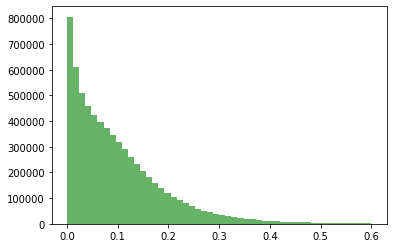

In [181]:
#plt.hist(flatData.mass, bins=30, range=[105000,160000], alpha=0.6, color='g')
plt.hist(df.photon_etcone20[0]/df.photon_pt[0], bins=50, range=[0,0.6], alpha=0.6, color='g')


           3             2
1.309e-12 x + 3.047e-07 x - 0.2179 x + 2.274e+04


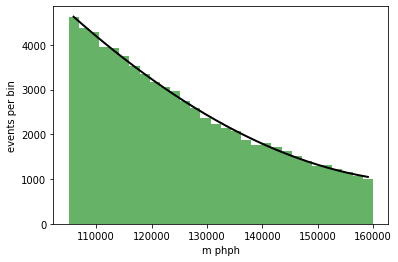

In [202]:
plt.figure()
plt.xlabel("m phph")
plt.ylabel("events per bin")
plt.hist(flatData.mass, bins=30, range=[105000,160000], alpha=0.6, color='g')
countsData, edges = np.histogram(flatData.mass, bins=30, range=(105000,160000))
centres = (edges[1:] + edges[:-1]) / 2

# get the width of each bin
bin_width = edges[1] - edges[0]
# sum over number in each bin and mult by bin width, which can be factored out
integral = bin_width * sum(countsData[0:30])

#print(centres)
#print(countsData)

p = np.poly1d(np.polyfit(centres, countsData, 3))
print(p)
plt.plot(centres, p(centres), 'k', linewidth=2)

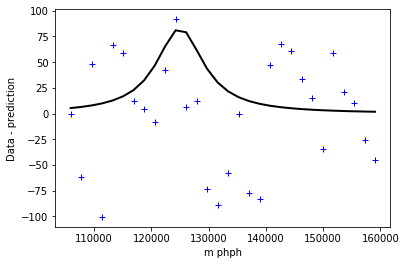

In [212]:
#ratio plot 
ratios = countsData - p(centres) 
plt.figure()
plt.xlabel("m phph")
plt.ylabel("Data - prediction")
plt.plot(centres, ratios,  'b+')
#plt.plot(centres, p, 'k', linewidth=2)

integral = 1300000.0

gt = ( scipy.stats.cauchy.pdf(centres, 125000.0, 5000.0) * integral)
plt.plot(centres, gt, 'k', linewidth=2)

plt.show()

In [146]:

#create a few arrays to hold some specific information about the collisions
massesData = np.array([])

nData = 0
nTarget = 200000
    
#loop over events and extract info from the array
for ev in range(0,len(flatData)):
        phph = flatData[ev][0] + flatData[ev][1] 
        mass = phph.mass
        et1Mass = flatData[ev][0].pt/mass
        et2Mass = flatData[ev][1].pt/mass
        if ((mass > 105000) & (et1Mass > 0.3) & (et2Mass > 0.3) ):
            massesData = np.append(massesData,mass)
            nData = nData + 1
            if ((nData % 10000) == 0):
                print("ev = " + str(nData))
        #if (nData == nTarget):
        #    break

ev = 10000
ev = 20000
ev = 30000
ev = 40000
ev = 50000
ev = 60000
ev = 70000
ev = 80000
ev = 90000
ev = 100000
ev = 110000
ev = 120000
ev = 130000
ev = 140000
ev = 150000
ev = 160000
ev = 170000
ev = 180000
ev = 190000
ev = 200000
ev = 210000
ev = 220000
ev = 230000
ev = 240000
ev = 250000
ev = 260000
ev = 270000
ev = 280000
ev = 290000
ev = 300000
ev = 310000
ev = 320000
ev = 330000
ev = 340000
ev = 350000
ev = 360000
ev = 370000
ev = 380000
ev = 390000
ev = 400000
ev = 410000
ev = 420000
ev = 430000
ev = 440000
ev = 450000
ev = 460000
ev = 470000
ev = 480000
ev = 490000
ev = 500000
ev = 510000
ev = 520000
ev = 530000
ev = 540000
ev = 550000
ev = 560000
ev = 570000
ev = 580000
ev = 590000
ev = 600000
ev = 610000
ev = 620000
ev = 630000
ev = 640000
ev = 650000
ev = 660000
ev = 670000
ev = 680000
ev = 690000
ev = 700000
ev = 710000
ev = 720000
ev = 730000
ev = 740000
ev = 750000
ev = 760000
ev = 770000
ev = 780000
ev = 790000
ev = 800000
ev = 810000
ev = 820000
ev = 830000
ev = 840000
e

           3             2
2.329e-10 x - 9.886e-05 x + 13.37 x - 5.476e+05


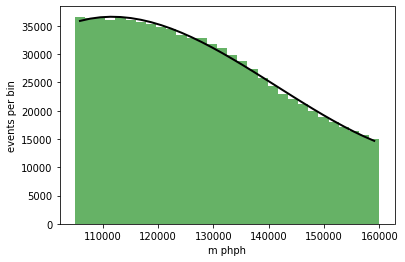

In [157]:
# plot the m phph histogram.
plt.figure()
plt.xlabel("m phph")
plt.ylabel("events per bin")
plt.hist(massesData, bins=30, range=[105000,160000], alpha=0.6, color='g')
countsData, edges = np.histogram(massesData, bins=30, range=(105000,160000))
centres = (edges[1:] + edges[:-1]) / 2

# get the width of each bin
bin_width = edges[1] - edges[0]
# sum over number in each bin and mult by bin width, which can be factored out
integral = bin_width * sum(countsData[0:30])

#print(centres)
#print(countsData)
#p = (expon.pdf(edges, mu, std) * integral)
#p = np.polyfit(centres, countsData, 3)

p = np.poly1d(np.polyfit(centres, countsData, 3))
print(p)
plt.plot(centres, p(centres), 'k', linewidth=2)

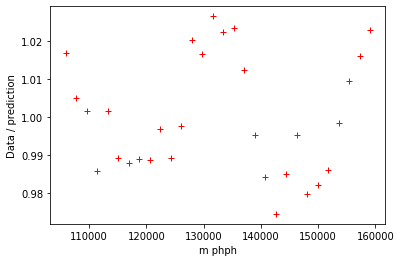

In [148]:
#ratio plot 
ratios = (countsData) / p(centres) 
plt.figure()
plt.xlabel("m phph")
plt.ylabel("Data / prediction")

plt.plot(centres, ratios,  'r+')


plt.show()
